# Problem Set 1, due April 12th at 3:30 pm 
(in other words, it is due at the start of the class).

### Before You Start
For this problem set, you should download INF0371-PS1.ipynb from Canvas. Create a local copy of the notebook and rename it LASTNAME_FIRSTNAME-PS1.ipynb. Then edit your renamed file directly in your browser by typing:
```
ipython notebook <name_of_downloaded_file>
```

Make sure the following libraries load correctly (hit Ctrl-Enter).


In [10]:
#IPython is what you are using now to run the notebook
import IPython
print ("IPython version:      %6.6s (need at least 1.0)" % IPython.__version__)

# Numpy is a library for working with Arrays
import numpy as np
print ("Numpy version:        %6.6s (need at least 1.7.1)" % np.__version__)

# SciPy implements many different numerical algorithms
import scipy as sp
print ("SciPy version:        %6.6s (need at least 0.12.0)" % sp.__version__)

# Pandas makes working with data tables easier
import pandas as pd
print ("Pandas version:       %6.6s (need at least 0.11.0)" % pd.__version__)

# Module for plotting
import matplotlib
print ("Maplotlib version:    %6.6s (need at least 1.2.1)" % matplotlib.__version__)

# SciKit Learn implements several Machine Learning algorithms
import sklearn
print ("Scikit-Learn version: %6.6s (need at least 0.13.1)" % sklearn.__version__)

IPython version:       5.1.0 (need at least 1.0)
Numpy version:        1.11.1 (need at least 1.7.1)
SciPy version:        0.18.1 (need at least 0.12.0)
Pandas version:       0.18.1 (need at least 0.11.0)
Maplotlib version:     1.5.3 (need at least 1.2.1)
Scikit-Learn version:   0.18 (need at least 0.13.1)


### Working in a group?
List the names of other students with whom you worked on this problem set:
- Marisa Nanakul

---

## Introduction to the assignment

For this assignment, you will be using the [Boston Housing Prices Data Set](http://archive.ics.uci.edu/ml/datasets/Housing).  Please read about the dataset carefully before continuing -- it is worth investing a few minutes up front otherwise you are likely to be hopelessly confused! Also, if you're new to analyzing data in Python, please make sure to read the relevant readings linked to on Canvas before beginning, otherwise you'll be stabbing in the dark.

Use the following commands to load the dataset:

In [11]:
from sklearn.datasets import load_boston
bdata = load_boston()

The following commands will provide some basic information about the shape of the data:

In [29]:
print (bdata.keys())
print (bdata.feature_names)
print (bdata.data.shape)
print (bdata.target.shape)

# uncomment the following if you want to see a lengthy description of the dataset
# print (bdata.DESCR)

dict_keys(['DESCR', 'feature_names', 'target', 'data'])
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
(506, 13)
(506,)


In [13]:
boston = pd.DataFrame(bdata.data)

In [14]:
boston.columns = bdata.feature_names[:]
print (boston.shape)

(506, 13)


---

## Part 1: Descriptive analysis

### 1.1: Explore the data

Let's dig into the data a bit to see what we're dealing with. The first thing to do is to make sure you understand how the data is organized, what the data types are, whether there is any missing data, and so forth. Get your bearings on your own, then answer the following questions.

 - 1.1.1: How many different variables are there in the dataset, and how many different observations?
 - 1.1.2: How many instances are classified as neighborhoods where the tract bounds the Charles River? 
 - 1.1.3: Show that dataset does not contain any missing values.
 - 1.1.4: Display the property tax rate in the 5 neighborhoods that have the highest median housing price.

In [16]:
boston['MEDV'] = bdata.target

#1.1.1
print(len(boston.columns))
print(len(boston.index))

#1.1.2
char_river_neighborhoods = boston.loc[boston['CHAS'] == 1]
print(len(char_river_neighborhoods))

#1.1.3
print (np.count_nonzero(boston.isnull().values))

#1.1.4
sorted_medv = boston.sort_values('MEDV', ascending=False)
print(sorted_medv['TAX'].head(5))

14
506
35
0
283    198.0
225    307.0
369    666.0
370    666.0
371    666.0
Name: TAX, dtype: float64


*Provide our answers below:*

 - 1.1.1: There are 14 variables and 506 observations.
 - 1.1.2: There are 35 neighborhoods where the tract bounds the Charles River
 - 1.1.3: There are no missing values in this dataset.
 - 1.1.4: The property tax rate for the 5 neighborhoods that have the highest median housing price (per \$10,000) is 198, 307, 666, 666, 666


### 1.2: Answer some basic questions
 - 1.2.1: What is the median housing price in Boston's most expensive neighborhood?
 - 1.2.2: How many neighborhoods have, on average, less than 5 rooms per dwelling?
 - 1.2.3: What is the property tax rate in the most expensive neighborhood that is also adjacent to the Charles River?
 - 1.2.4: What is the crime rate in the neighborhood with the highest median housing price? 
 - 1.2.5: What is the crime rate in the neighborhood with the lowest median housing price?

In [17]:
#1.2.1
print(sorted_medv['MEDV'].head(1))

#1.2.2
five_rooms = boston.loc[boston['RM'] < 5]
print(len(five_rooms))

#1.2.3
expensive_sorted = char_river_neighborhoods.sort_values('MEDV', ascending=False)
print(expensive_sorted.TAX.head(1))

#1.2.4
print(sorted_medv['CRIM'].head(1))

#1.2.5
sorted_desc = boston.sort_values('MEDV', ascending=True)
print(sorted_desc['CRIM'].head(1))

283    50.0
Name: MEDV, dtype: float64
15
372    666.0
Name: TAX, dtype: float64
283    0.01501
Name: CRIM, dtype: float64
398    38.3518
Name: CRIM, dtype: float64


*Provide our answers below:*

 - 1.2.1: The median housing price in Boston's most expensive neighborhood is \$50,000.
 - 1.2.2: There are 15 neighborhoods that have, on average, less than 5 rooms per dwelling.
 - 1.2.3: The property tax rate in the most expensive neighbhorhood that is also adjacent to the Charles River is $666 per \$10,000.
 - 1.2.4: The crime rate in the neighborhood with the highest median housing price is 0.01501 per capita.
 - 1.2.5: The crime rate in the neighborhood with the lowest median housing price is 38.3518 per capita.

### 1.3: Summary statistics

Create a clean, organized table that shows just the following information (no more, no less) for each variable in the dataset. Note that your table should have K rows (one for each variable) and 7 columns, ordered as below:
 - The name of the variable
 - The number of observations with non-missing values
 - The mean of the variable
 - The standard deviation of the variable
 - The minimum value of the variable
 - The median of the variable
 - The maximum value of the variable

In [18]:
nonmissing = boston.notnull().sum()
mean = boston.mean()
standard_deviation = boston.std(axis=0)
minimum = boston.min()
median = boston.median()
maximum = boston.max()

summary = pd.concat([nonmissing, mean, standard_deviation, minimum, median, maximum], axis=1).reset_index()
summary.columns = ['Name', 'Non-Missing Values', 'Mean', 'Standard Deviation', 'Minimum', 'Median', 'Maximum']
summary

,Name,Non-Missing Values,Mean,Standard Deviation,Minimum,Median,Maximum
0,CRIM,506,3.593761,8.596783,0.00632,0.25651,88.9762
1,ZN,506,11.363636,23.322453,0.00000,0.00000,100.0000
2,INDUS,506,11.136779,6.860353,0.46000,9.69000,27.7400
3,CHAS,506,0.069170,0.253994,0.00000,0.00000,1.0000
4,NOX,506,0.554695,0.115878,0.38500,0.53800,0.8710
5,RM,506,6.284634,0.702617,3.56100,6.20850,8.7800
6,AGE,506,68.574901,28.148861,2.90000,77.50000,100.0000
7,DIS,506,3.795043,2.105710,1.12960,3.20745,12.1265
8,RAD,506,9.549407,8.707259,1.00000,5.00000,24.0000
9,TAX,506,408.237154,168.537116,187.00000,330.00000,711.0000


### 1.4 Simple statistical tests

Using a t-test, compare the median house value in locations that are adjacent to the Charles River to locations that are not adjacent to the Charles River. Do you reject the null hypothesis that prices are equivalent?

In [19]:
adjacent = boston[boston.CHAS == 1].MEDV
not_adjacent = boston[boston.CHAS == 0].MEDV
sp.stats.ttest_ind(adjacent, not_adjacent)

Ttest_indResult(statistic=3.9964374660905091, pvalue=7.3906231705199048e-05)

We calculated a p-value of 7.391 x 10^-5. This is less than alpha (which we can take to be 0.05), so we reject the null hypothesis that prices are equivalent.

---

## Part 2: Histograms and Scatterplots


### 2.1: Histogram of housing prices

Below you will find some very basic code to make a very basic histogram of median housing prices (the "target" variable) for your dataset.  Your first task is to make this graph look pretty by doing the following:

1. Add appropriate labels to the x and y axes, make sure to include units
2. Change the bin width on the histogram to be $1000
3. Remove the axes on the top and right side of the plot window
4. Change the color of the bars to be green, and remove the black borders from the bars


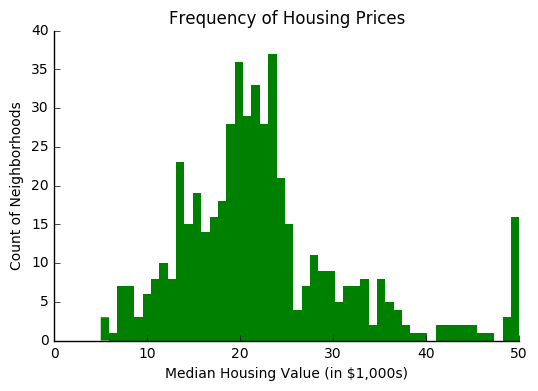

In [20]:
# prepare IPython to work with matplotlib and import the library to something convenient
# %matplotlib inline  
import matplotlib.pyplot as plt  

# 2.1.2, #2.1.4
plt.hist(bdata.target, bins = 50, color='green', lw=0)
plt.xlim(xmin=0)
plt.title('Frequency of Housing Prices')

#2.1.1
plt.xlabel('Median Housing Value (in $1,000s)')
plt.ylabel('Count of Neighborhoods')

#2.1.3
plt.subplot().spines['top'].set_visible(False)
plt.subplot().spines['right'].set_visible(False)
plt.tick_params(
    axis='x',          
    bottom='on',      
    top='off')
plt.tick_params(
    axis='y',          
    bottom='on',      
    top='off',
    right = "off")

plt.show()

### 2.2: Scatter plot of housing prices and crime

Use matplotlib to create a scatter plot that shows the relationship between the median value of the home (y-axis) and the per-capita crime rate (x-axis).  Properly label your axes, and make sure that your graphic looks polished and professional.


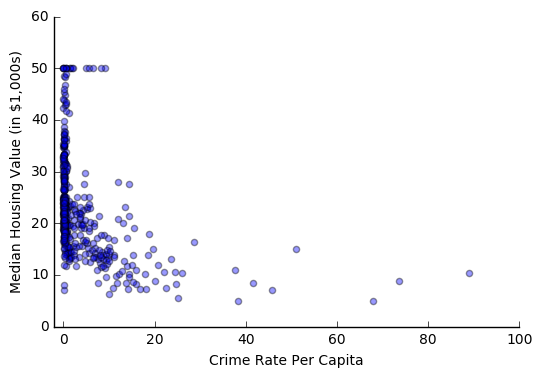

Correlation Coefficient: -0.385831689884


In [21]:
plt.scatter(boston['CRIM'], boston['MEDV'], alpha=0.4)

plt.xlabel('Crime Rate Per Capita')
plt.ylabel('Median Housing Value (in $1,000s)')

plt.subplot().spines['top'].set_visible(False)
plt.subplot().spines['right'].set_visible(False)
plt.tick_params(
    axis='x',          
    bottom='on',      
    top='off')
plt.tick_params(
    axis='y',          
    bottom='on',      
    top='off',
    right = "off")

plt.xlim(xmin = -2)

plt.show()
r = np.corrcoef(boston['MEDV'], boston['CRIM'])
print('Correlation Coefficient: ' + str(r[0,1]))

### 2.3: Interpret

What do you observe in the above scatter plot? Does there appear to be a relationship between crime rates and housing prices in Boston? Calculate the correlation between these two variables. Do you think this relationship is causal, or just a correlation? Justify your position.

From calculating the correlation coefficient, there seems to be a slight negative correlation between crime rates and housing prices (as median housing value decreases, in some cases the crime rate increases). This is also something we can view from the scatterplot above. However, since the correlation coefficient is not close to -1 or +1, we cannot say that the two are strongly correlated.

I don't think that the relationship is causal. Especially since we calculated a low correlation, I do not believe that one causes the other (for example, a low median housing value does not always mean the crime rate per capita increases). I believe that there are some other confounding variables that accounts for the slight correlation. 

### 2.4 Correlation Matrix

Calculate the correlation of every pair of variables in the dataset. Create a *K* x *K* matrix where the value in the (*i*,*j*) cell is the correlation between the *i*th and *j*th variable. Show off your skills by coloring the cell so that large positive correlations appear green and large negative correlations appear green (use a gradient to make this pretty). What two variables appear to me most positively and negatively correlated?

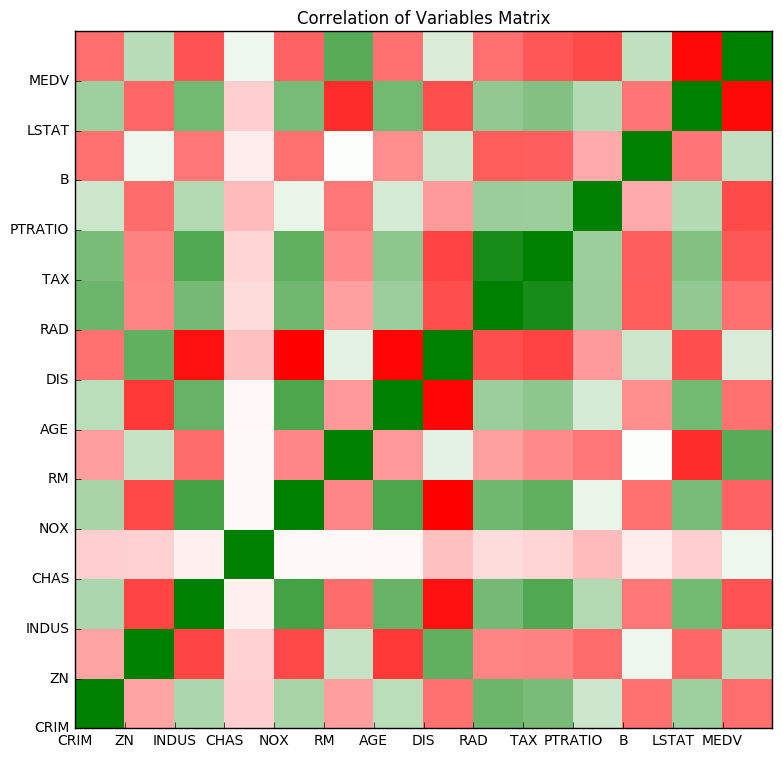

In [30]:
from matplotlib.colors import LinearSegmentedColormap

correlation = boston.corr()
gradient = LinearSegmentedColormap.from_list('mycmap', ['red', 'white', 'green'])
            
fig, ax = plt.subplots()

cormatrix = ax.pcolor(correlation, cmap = gradient)

#Made the matrix bigger to fit the axis labels
fig = plt.gcf()
fig.set_size_inches(9, 9)

names = boston.columns
ax.set_xticklabels(names)
ax.set_yticklabels(names)

#So all labels will show
ax.set_xticks(np.arange(14))
ax.set_yticks(np.arange(14))

plt.tick_params(
    axis='x',          
    bottom='on',      
    top='off')
plt.tick_params(
    axis='y',          
    bottom='on',      
    top='off',
    right = "off")

plt.title('Correlation of Variables Matrix')

plt.show(cormatrix)

From looking at this matrix, the two variables that appear to be most positively correlated are full-value property-tax rate per $10,000(TAX) and index of accessibility to radial highways(RAD). These two variables produced the darkest green box which shows a strong positive correlation. The two variables that appear to be most negatively correlated are weighted distances to five Boston employment centres(DIS) and nitric oxides concentration (parts per 10 million)(NOX), they have the darkest red box which shows a strong negative correlation.

Note: I assumed that there was a typo in the instructions and that we were supposed to go from red to green instead of green to green since we were asked to say which variables were most positively AND negatively correlated.

### 2.5 Create your own (creative and effective) visualization

Use another type of graph or chart to illustrate an interesting pattern in the data.  Be creative in your visualization, and make sure to produce a "publication-quality" graph.  Points will be given for useful and creative graphs; points will be deducted for confusing issues like unlabeled axes.  If you're new to data visualization, [this guide](http://pubs.aeaweb.org/doi/pdfplus/10.1257/jep.28.1.209) is a good place to start.

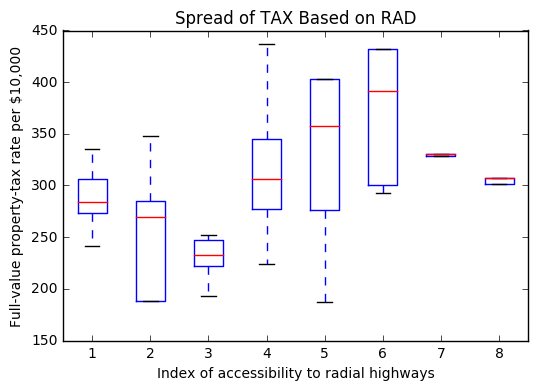

In [28]:
#I created a visualization to look at the spread of full-value property-tax rate 
#based on index of accessibility to radical highways.
#I only looked at indexes 1.0 to 8.0 because the other ones did not produce boxplots

array = []

for x in range(1, 9):
    r = boston.loc[boston['RAD'] == x].TAX
    array.append(r)

plt.boxplot(array, 0, '')
plt.tick_params(
    axis='x',          
    bottom='on',      
    top='off')
plt.tick_params(
    axis='y',          
    bottom='on',      
    top='off',
    right = "off")
        
plt.title('Spread of TAX Based on RAD')
plt.xlabel('Index of accessibility to radial highways')
plt.ylabel('Full-value property-tax rate per $10,000')

plt.show()